In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [290]:
us = pd.read_csv('../data/us_equities_cleaned.csv')

In [291]:
us.head()

,Unnamed: 0,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,...,NSM,CLP,CTX,CTR,DYN,AIB,KIM,SFN,TCO,S
0,8032,122.55,0.47,6.96,0.78,1.62,3.34,1.46,1.37,1.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8033,122.74,0.47,7.13,0.79,1.68,3.27,1.48,1.38,1.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8034,120.05,0.47,6.97,0.79,1.63,3.25,1.46,1.34,1.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8035,119.18,0.46,6.94,0.78,1.63,3.24,1.45,1.32,1.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8036,118.93,0.47,6.94,0.77,1.61,3.26,1.44,1.36,1.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
clipped_us = us.iloc[:2001,2:52]
clipped_us_returns = np.log(clipped_us).diff()
clipped_us_returns = clipped_us_returns.iloc[1:,]

In [293]:
sign = np.sign(clipped_us_returns)

In [294]:
correl_m = sign.corr()

In [295]:
eigenvalues, eigenvectors = np.linalg.eig(correl_m)
eigenvalues_old = eigenvalues.copy()

In [296]:
q = len(clipped_us_returns.columns)/len(clipped_us_returns.index)

In [297]:
lambda_p = 1 + q + 2*np.sqrt(q)

In [298]:
lambda_m = 1 + q - 2*np.sqrt(q)

In [299]:
n_clip = len(eigenvalues[eigenvalues <= lambda_p])

In [300]:
delta = (20-eigenvalues[eigenvalues > lambda_p].sum())/n_clip

In [301]:
eigenvalues[eigenvalues <= lambda_p] = delta

In [302]:
c = np.dot(eigenvectors.T,np.dot(np.diag(eigenvalues),eigenvectors))
np.fill_diagonal(c,1)

In [303]:
c_df = pd.DataFrame(c,columns = correl_m.columns, index = correl_m.columns)

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.10599958,  0.22477902,  0.34355846,  0.4623379 ,  0.58111734,
         0.69989679,  0.81867623,  0.93745567,  1.05623511,  1.17501455,
         1.29379399,  1.41257344,  1.53135288,  1.65013232,  1.76891176,
         1.8876912 ,  2.00647064,  2.12525009,  2.24402953,  2.36280897,
         2.48158841,  2.60036785,  2.7191473 ,  2.83792674,  2.95670618,
         3.07548562,  3.19426506,  3.3130445 ,  3.43182395,  3.550603

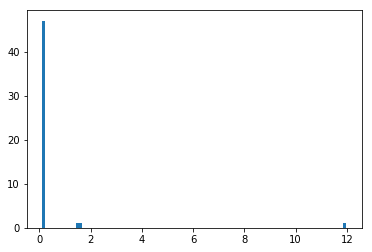

In [310]:
plt.hist(eigenvalues,bins =100)